# **<center>Big Data and Finance </center>**


## <center> Presentation Bitcoin Prediction </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1OX3oU22gh0_gLwrqPRscUlun4aJl3nrv?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import datetime
import os
import random # to shuffle the sequences
from IPython.display import Image # for showing graphs from the lectures
from sklearn.model_selection import train_test_split


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Change the directory
os.chdir("./gdrive/My Drive/Colab Notebooks/CW")

# 1. Exploring the dataset

## 1.1 Preprocessing the data




In [ ]:
import pytz
import yfinance as yf

In [ ]:
start_date="2017-01-01"
end_date="2022-06-01"
spy_ohlc_df = yf.download('SPY', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
spy_ohlc_df=spy_ohlc_df.rename(columns={"Close":"SPt"})
spy_ohlc_df.head()

,Open,High,Low,SPt,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,205.509079,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,206.731735,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,206.567505,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,207.306503,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,206.622238,46939700


In [ ]:
# Import the data
btc_data = pd.read_csv("BTC-USD.csv")
#btc_data.to_datetime(btc_data.Date, format="%Y%m%d%")
btc_data=btc_data.rename(columns={"Close":"BTC"})
btc_data.head()

,Date,BTC,Volume
0,2017-01-01,998.325012,147775008.0
1,2017-01-02,1021.750000,222184992.0
2,2017-01-03,1043.839966,185168000.0
3,2017-01-04,1154.729980,344945984.0
4,2017-01-05,1013.380005,510199008.0


In [ ]:
SP_data = spy_ohlc_df[['SPt']]
SP_data = SP_data.reset_index()


In [ ]:
btc_data['Date'] = btc_data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
SP_data['Date'] = SP_data['Date'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

In [ ]:
data = pd.merge(SP_data, btc_data,on='Date', how='left')

In [ ]:
#data['SPt-1'] = data['SPt'].shift(1)
#data['SPt-2'] = data['SPt'].shift(2)
#data['SPt-3'] = data['SPt'].shift(3)
#data['SPt-4'] = data['SPt'].shift(4)
#data['SPt-5'] = data['SPt'].shift(5)

data['BTCt-1'] = data['BTC'].shift(1)
data['BTCt-2'] = data['BTC'].shift(2)
data['BTCt-3'] = data['BTC'].shift(3)
data['BTCt-4'] = data['BTC'].shift(4)
data['BTCt-5'] = data['BTC'].shift(5)


In [ ]:
data=data.dropna()
from sklearn import preprocessing

In [ ]:
df = data.loc[data['Date'] >= '2017-01-10']
df_training = df.loc[ data['Date'] <= '2021-12-31']
df_test = data.loc[data['Date'] > '2021-12-31']
xdrop = ['Date','BTC']
target=['BTC']

In [ ]:
x = data.drop(xdrop,axis=1)
y = data[target]

X_train = df_training.drop(xdrop,axis=1)
y_train = df_training[target]


X_test = df_test.drop(xdrop,axis=1)
y_test = df_test[target]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# normalise data
X_train=scaler.fit_transform(X_train) 
y_train=scaler.fit_transform(y_train)
X_test=scaler.fit_transform(X_test)
y_test=scaler.fit_transform(y_test)

In [ ]:
pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.


In [ ]:
x_train=X_train[:,1:]
x_test=X_test[:,1:]

# 2 Building the Model


##  2.1 OLS Model

In [ ]:
import statsmodels.api as sm
import pylab

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()

###  2.1.1 using t-1 bitcoin price to predict bitcoin price at time t

In [ ]:

OLS=model.fit(x_train, y_train)
y_hat_OLS = model.predict(x_test)

###  2.1.2 introducing S&P 500 as a predictor

In [ ]:
OLS_SP=model.fit(X_train, y_train)
y_hat_OLS_SP= model.predict(X_test)

## 3 NN Model

In [ ]:
pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional
from keras.layers import CuDNNLSTM
from tensorflow.keras import activations
from tensorflow.keras import layers

### 3.1 NN2

In [ ]:
NN2 = Sequential()
NN2.add(Dense(32, activation = "relu", input_dim = x_train.shape[1])) 
NN2.add(Dense(16, activation = "relu"))
NN2.add(Dense(1, activation = "linear"))
NN2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# hyperparameters
n_epochs = [int(x) for x in np.linspace(10, 20, num = 2)]
batch_size = [int(x) for x in np.linspace(20, 100, num = 2)]
learning_rates = [0.02, 0.2]

param_grid = {'n_epochs': n_epochs, 'batch_size': batch_size, 'learning_rates': learning_rates}

print('The parameters considered are:')
for key, item in param_grid.items():
    print(f'\t- {key}: {item}')

The parameters considered are:
	- n_epochs: [10, 20]
	- batch_size: [20, 100]
	- learning_rates: [0.02, 0.2]


In [ ]:
# run through every combination of param_grid and update my results list
import tensorflow.keras.optimizers as opt

results = list()
for epochs in n_epochs:
    for batches in batch_size:
        for learning_rate in learning_rates:
            optimizer = opt.SGD(learning_rate=learning_rate)
            NN2.compile(loss = "mean_squared_error", optimizer = optimizer)
            fit = NN2.fit(x_train, y_train, epochs = epochs, batch_size = batches, validation_split=0.01, verbose = 0)
            results.append([epochs, batches, learning_rate, fit.history["loss"][-1], fit.history["val_loss"][-1]])

In [ ]:
# find the hyperparameter combination with the lowest val_loss
val_loss = 10
for result in results:
    if result[3] < val_loss:
        val_loss = result[3]
for result in results:
    if result[3] == val_loss:
        epochs = result[0]
        batches = result[1]
        learning_rate = result[2]
        print(f"Optimal Epochs: {result[0]}, Batches: {result[1]} and Learning Rate: {result[2]}")

Optimal Epochs: 20, Batches: 20 and Learning Rate: 0.02


#### 3.1.1 using t-1 bitcoin price to predict bitcoin price at time t

In [ ]:
optimizer = opt.SGD(learning_rate=learning_rate)
NN2.compile(loss = "mean_squared_error", optimizer = optimizer)

fit_NN2 = NN2.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batches,
    shuffle=False,
    validation_split=0.01
)

Epoch 1/20
63/63 [==============================] - 2s 12ms/step - loss: 0.0043 - val_loss: 0.0107
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0107
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0044 - val_loss: 0.0106
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0105
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0105
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 8/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 9/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0102
Epoch 10/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0102
Epoch 11/20
63/63 

In [ ]:
y_hat_NN2=NN2.predict(x_test)

In [ ]:
 NN2.evaluate(x_test, y_test, verbose=0)


0.13164332509040833

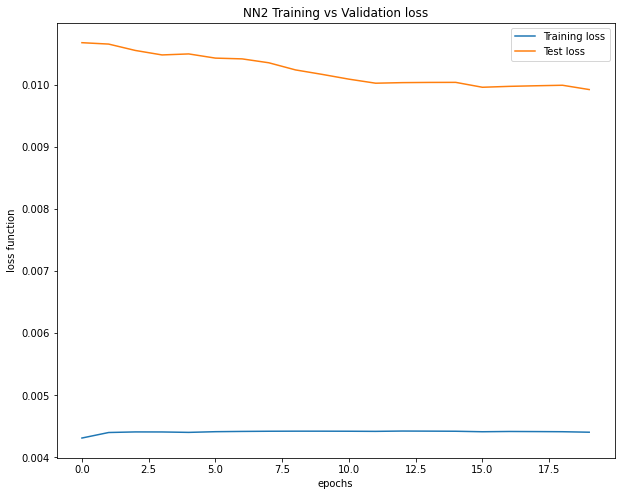

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN2.history["loss"], label = "Training loss")
plt.plot(range(epochs), fit_NN2.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("NN2 Training vs Validation loss")
plt.legend()
plt.show()

#### 3.1.2 introducing S&P 500 as a predictor

In [ ]:
NN2sp = Sequential()
NN2sp.add(Dense(32, activation = "relu", input_dim = X_train.shape[1])) 
NN2sp.add(Dense(16, activation = "relu"))
NN2sp.add(Dense(1, activation = "linear"))
NN2sp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                256       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = opt.SGD(learning_rate=learning_rate)
NN2sp.compile(loss = "mean_squared_error", optimizer = optimizer)

fit_NN2_SP = NN2sp.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batches,
    shuffle=False,
    validation_split=0.01
)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 0.1391 - val_loss: 0.0274
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0296
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.0299
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.0300
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.0300
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.0298
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0295
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.0294
Epoch 9/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0294
Epoch 10/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0292
Epoch 11/20
63/63 [

In [ ]:
y_hat_NN2_SP=NN2sp.predict(X_test)

In [ ]:
NN2sp.evaluate(X_test, y_test, verbose=0)

0.24144399166107178

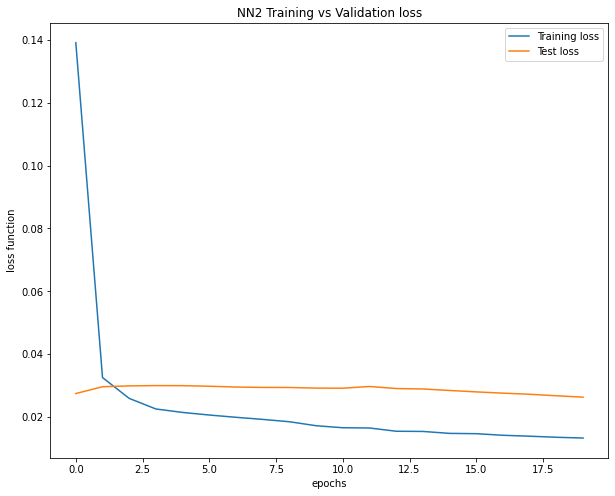

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN2_SP.history["loss"], label = "Training loss")
plt.plot(range(epochs), fit_NN2_SP.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("NN2 Training vs Validation loss")
plt.legend()
plt.show()

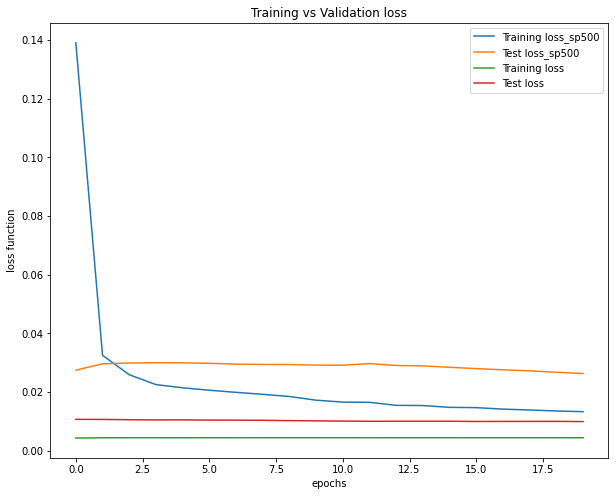

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN2_SP.history["loss"], label = "Training loss_sp500")
plt.plot(range(epochs), fit_NN2_SP.history["val_loss"], label = "Test loss_sp500")
plt.plot(range(epochs), fit_NN2.history["loss"], label = "Training loss")
plt.plot(range(epochs), fit_NN2.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("NN2 Training vs Validation loss")
plt.legend()
plt.show()

### 3.2 NN3

In [ ]:
NN3 = Sequential()
NN3.add(Dense(32, activation = "relu", input_dim = x_train.shape[1])) 
NN3.add(Dense(16, activation = "relu"))
NN3.add(Dense(8, activation = "relu"))
NN3.add(Dense(1, activation = "linear"))
NN3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                224       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# run through every combination of param_grid and update my results list
import tensorflow.keras.optimizers as opt

results = list()
for epochs in n_epochs:
    for batches in batch_size:
        for learning_rate in learning_rates:
            optimizer = opt.SGD(learning_rate=learning_rate)
            NN3.compile(loss = "mean_squared_error", optimizer = optimizer)
            fit = NN3.fit(x_train, y_train, epochs = epochs, batch_size = batches, validation_split=0.01, verbose = 0)
            results.append([epochs, batches, learning_rate, fit.history["loss"][-1], fit.history["val_loss"][-1]])


In [ ]:
# find the hyperparameter combination with the lowest val_loss
val_loss = 10
for result in results:
    if result[3] < val_loss:
        val_loss = result[3]
for result in results:
    if result[3] == val_loss:
        epochs = result[0]
        batches = result[1]
        learning_rate = result[2]
        print(f"Optimal Epochs: {result[0]}, Batches: {result[1]} and Learning Rate: {result[2]}")

Optimal Epochs: 20, Batches: 20 and Learning Rate: 0.02


####  3.2.1 using t-1 bitcoin price to predict bitcoin price at time t

In [ ]:
optimizer = opt.SGD(learning_rate=learning_rate)
NN3.compile(loss = "mean_squared_error", optimizer = optimizer)

fit_NN3 = NN3.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batches,
    shuffle=False,
    validation_split=0.01
)

Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 0.0064 - val_loss: 0.0109
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0108
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0108
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0107
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0107
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0107
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0107
Epoch 8/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0106
Epoch 9/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0106
Epoch 10/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0106
Epoch 11/20
63/63 [

In [ ]:
y_hat_NN3=NN3.predict(x_test)

In [ ]:
resultNN3 = NN3.evaluate(x_test, y_test, verbose=0)
print(resultNN3)

0.32419320940971375


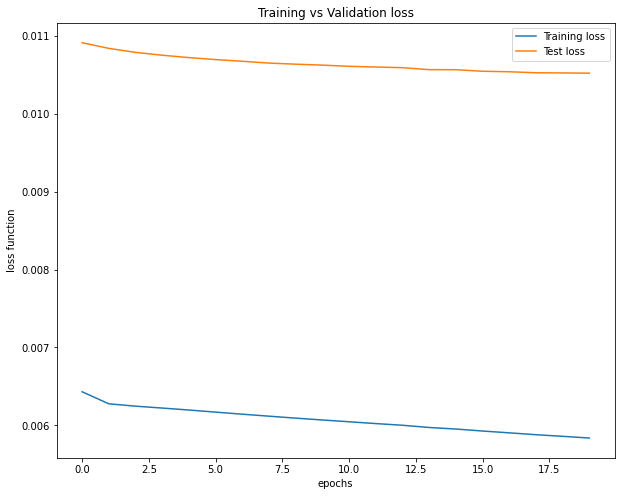

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN3.history["loss"], label = "Training loss")
plt.plot(range(epochs), fit_NN3.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("Training vs Validation loss")
plt.legend()
plt.show()

#### 3.2.2 introducing S&P 500 as a predictor

In [ ]:
NN3sp = Sequential()
NN3sp.add(Dense(32, activation = "relu", input_dim = X_train.shape[1])) 
NN3sp.add(Dense(16, activation = "relu"))
NN3sp.add(Dense(8, activation = "relu"))
NN3sp.add(Dense(1, activation = "linear"))
NN3sp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                256       
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = opt.SGD(learning_rate=learning_rate)
NN3sp.compile(loss = "mean_squared_error", optimizer = optimizer)

fit_NN3_sp = NN3sp.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batches,
    shuffle=False,
    validation_split=0.01
)

Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 0.3967 - val_loss: 0.0217
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0691 - val_loss: 0.0339
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0337
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0329
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0319
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0310
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0300
Epoch 8/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0291
Epoch 9/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0284
Epoch 10/20
63/63 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0277
Epoch 11/20
63/63 [

In [ ]:
y_hat_NN3_sp=NN3sp.predict(X_test)

In [ ]:
resultNN3sp = NN3sp.evaluate(X_test, y_test, verbose=0)
print(resultNN3sp)

0.18094202876091003


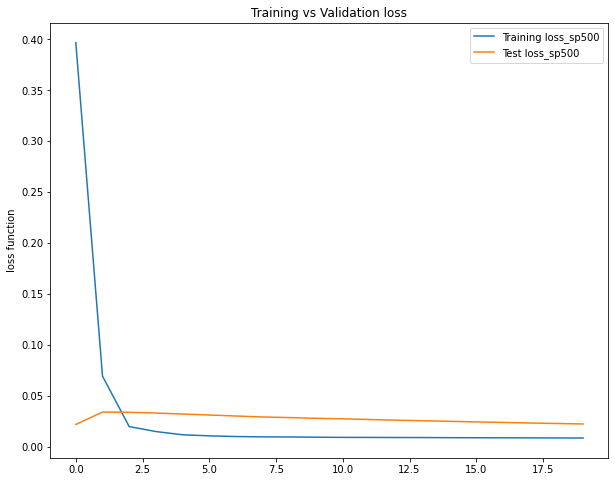

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN3_sp.history["loss"], label = "Training loss_sp500")
plt.plot(range(epochs), fit_NN3_sp.history["val_loss"], label = "Test loss_sp500")
plt.ylabel("loss function")
plt.title("Training vs Validation loss")
plt.legend()
plt.show()

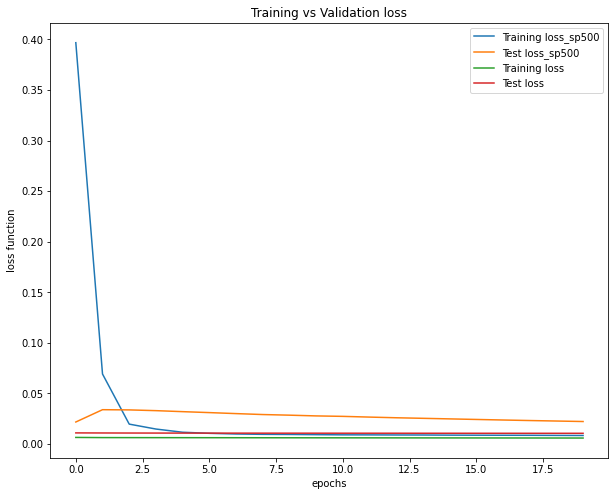

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(epochs), fit_NN3_sp.history["loss"], label = "Training loss_sp500")
plt.plot(range(epochs), fit_NN3_sp.history["val_loss"], label = "Test loss_sp500")
plt.plot(range(epochs), fit_NN3.history["loss"], label = "Training loss")
plt.plot(range(epochs), fit_NN3.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("Training vs Validation loss")
plt.legend()
plt.show()

### 3.3 LSTM

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
btc_data=btc_data.drop(['Date','Volume'],axis=1)

In [ ]:
btc_data = scaler.fit_transform(btc_data)

In [ ]:
    data_LSTM = []
    seq_len=30

    for i in range(len(btc_data) - seq_len):
        data_LSTM.append(btc_data[i: i + seq_len])

    data_LSTM=np.array(data_LSTM).astype(np.float32)
  

In [ ]:
  Split_int = int(0.9 * data_LSTM.shape[0])

  X_train_LSTM = data_LSTM[:Split_int, :-1, :]
  y_train_LSTM = data_LSTM[:Split_int, -1, :]


  X_test_LSTM = data_LSTM[Split_int:, :-1, :]
  y_test_LSTM = data_LSTM[Split_int:, -1, :]


In [ ]:
LSTM_Mode = Sequential() 
LSTM_Mode.add(LSTM(units = 32, activation = 'relu', return_sequences = True, input_shape = (X_train_LSTM.shape[1], 1)))
LSTM_Mode.add(LSTM(units = 8, activation = 'relu'))
LSTM_Mode.add(Dense(units =1))
LSTM_Mode.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 29, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 1312      
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,673
Trainable params: 5,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_Mode.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

LSTMfit = LSTM_Mode.fit(
    X_train_LSTM,
    y_train_LSTM,
    epochs=20,
    batch_size=50,
    validation_split=0.1)

Epoch 1/20
32/32 [==============================] - 3s 33ms/step - loss: 0.5492 - val_loss: 2.9779
Epoch 2/20
32/32 [==============================] - 1s 22ms/step - loss: 0.2530 - val_loss: 1.7196
Epoch 3/20
32/32 [==============================] - 1s 22ms/step - loss: 0.1191 - val_loss: 1.4740
Epoch 4/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0908 - val_loss: 1.1124
Epoch 5/20
32/32 [==============================] - 1s 24ms/step - loss: 0.0751 - val_loss: 0.7680
Epoch 6/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0577 - val_loss: 0.4087
Epoch 7/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0322 - val_loss: 0.1391
Epoch 8/20
32/32 [==============================] - 1s 24ms/step - loss: 0.0194 - val_loss: 0.1979
Epoch 9/20
32/32 [==============================] - 1s 22ms/step - loss: 0.0197 - val_loss: 0.1392
Epoch 10/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0182 - val_loss: 0.1548
Epoch 11/

In [ ]:
y_hat_lstm=LSTM_Mode.predict(X_test_LSTM)

In [ ]:
LSTM_Mode.evaluate(X_test_LSTM, y_test_LSTM)

7/7 [==============================] - 0s 4ms/step - loss: 0.0648


0.06484095752239227

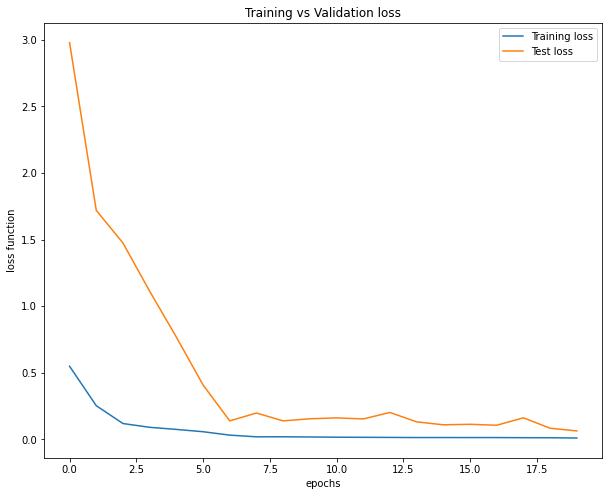

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(20), LSTMfit.history["loss"], label = "Training loss")
plt.plot(range(20), LSTMfit.history["val_loss"], label = "Test loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.title("Training vs Validation loss")
plt.legend()
plt.show()

# 3. Summary and Plots

In [ ]:
y_test_inv = scaler.inverse_transform(y_test) # real 

# predict
y_hat_OLS_inv = scaler.inverse_transform(y_hat_OLS)
y_hat_OLS_inv_sp = scaler.inverse_transform(y_hat_OLS_SP)

y_hat_NN2_inv = scaler.inverse_transform(y_hat_NN2)
y_hat_NN2_inv_sp = scaler.inverse_transform(y_hat_NN2_SP)

y_hat_NN3_inv = scaler.inverse_transform(y_hat_NN3)
y_hat_NN3_inv_sp = scaler.inverse_transform(y_hat_NN3_sp)


In [ ]:
# LSTM
y_hat_lstm_inv=scaler.inverse_transform(y_hat_lstm) # predict
y_test_lstm_inv=scaler.inverse_transform(y_test_LSTM)  # real 

In [ ]:
import pylab

In [ ]:
df_time = data.loc[data['Date'] > '2021-12-31']['Date']
df_time

1259    2022-01-03
1260    2022-01-04
1261    2022-01-05
1262    2022-01-06
1263    2022-01-07
           ...    
1357    2022-05-24
1358    2022-05-25
1359    2022-05-26
1360    2022-05-27
1361    2022-05-31
Name: Date, Length: 103, dtype: object

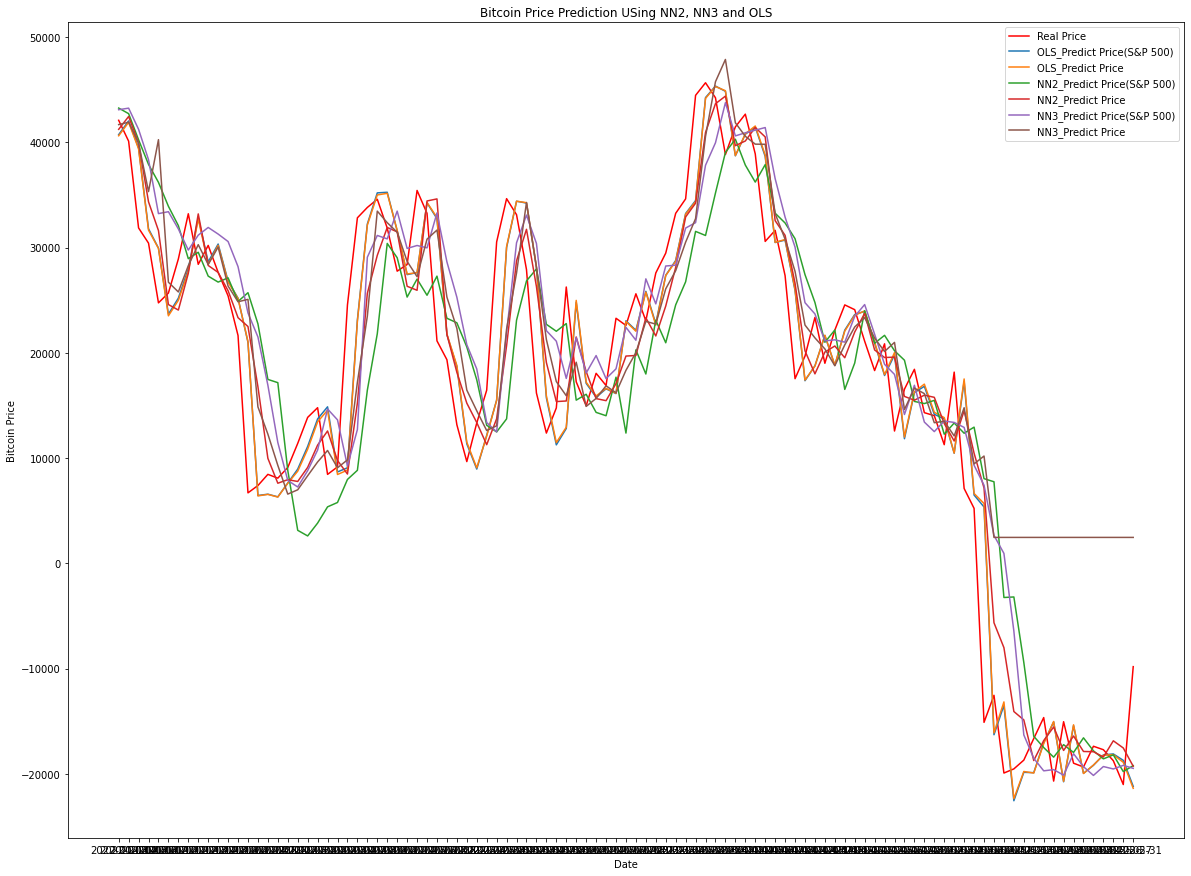

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
x = np.array(df_time)
plt.plot(x, y_test_inv, color = 'r',label = "Real Price")
plt.plot(x, y_hat_OLS_inv_sp, label = "OLS_Predict Price(S&P 500)")
plt.plot(x, y_hat_OLS_inv,label = "OLS_Predict Price")
plt.plot(x, y_hat_NN2_inv_sp, label = "NN2_Predict Price(S&P 500)")
plt.plot(x, y_hat_NN2_inv,label = "NN2_Predict Price")
plt.plot(x, y_hat_NN3_inv_sp,label = "NN3_Predict Price(S&P 500)")
plt.plot(x, y_hat_NN3_inv,label = "NN3_Predict Price")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Prediction USing NN2, NN3 and OLS")
plt.legend()
plt.show()




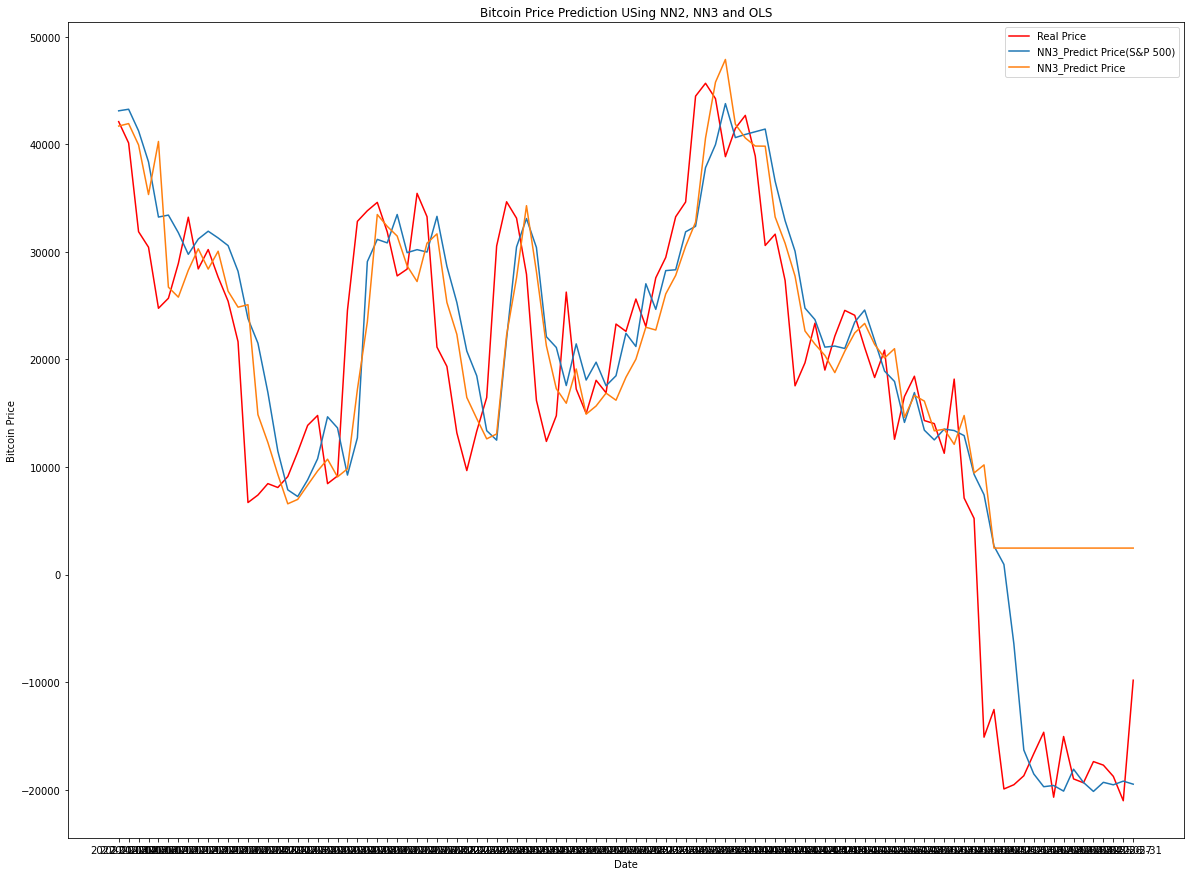

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
x = np.array(df_time)
plt.plot(x, y_test_inv, color = 'r', label = "Real Price")

plt.plot(x, y_hat_NN3_inv_sp, label = "NN3_Predict Price(S&P 500)")
plt.plot(x, y_hat_NN3_inv, label = "NN3_Predict Price")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Prediction USing NN2, NN3 and OLS")
plt.legend()
plt.show()

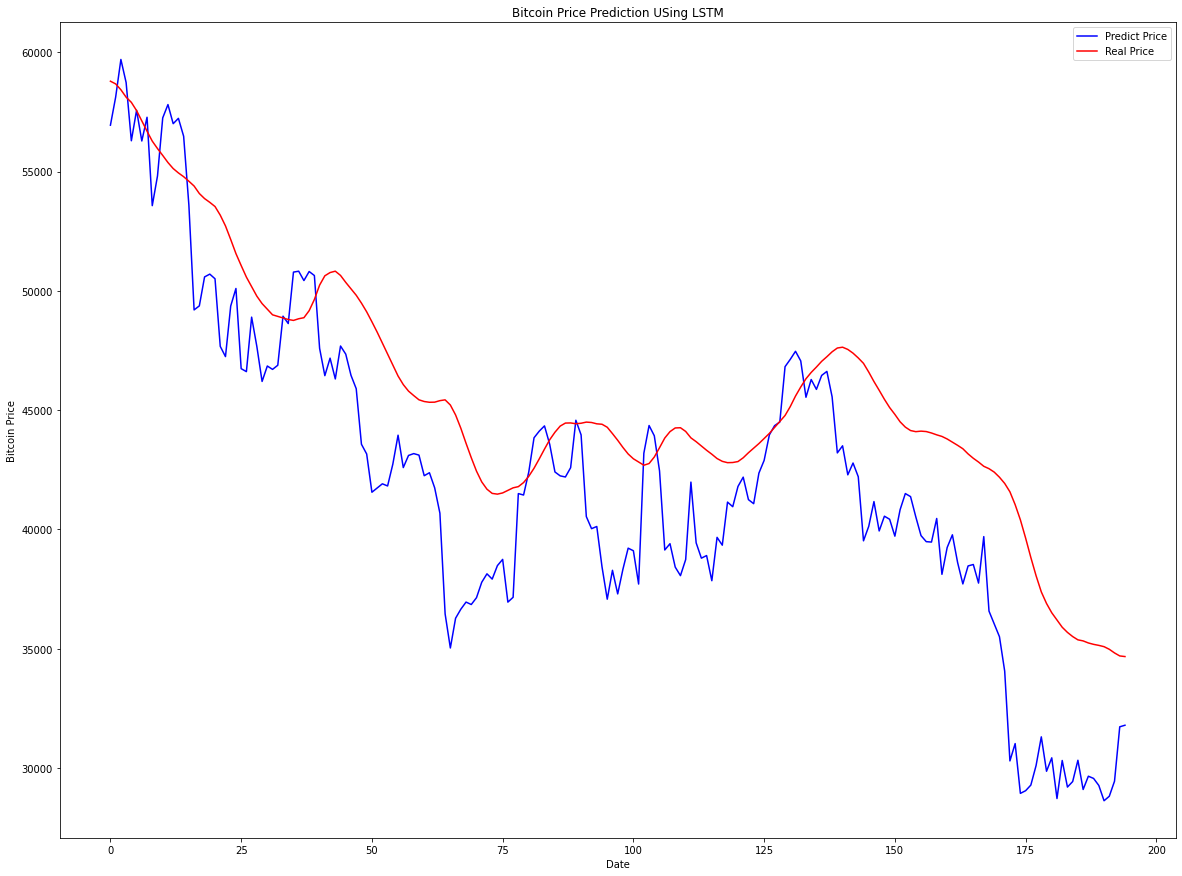

In [ ]:
plt.figure(figsize=(20, 15))


plt.plot( y_test_lstm_inv, color = 'b',label = "Predict Price")
plt.plot( y_hat_lstm_inv, color = 'r',label = "Real Price")

plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Prediction USing LSTM")
plt.legend()
plt.show()